In [ ]:
%pip install sklearn

         Date    Open    High     Low   Close
0  2000.01.24  1.0028  1.0077  0.9997  1.0071
1  2000.01.25  1.0070  1.0096  0.9992  1.0012
2  2000.01.26  1.0012  1.0055  0.9995  1.0003
3  2000.01.27  1.0007  1.0030  0.9868  0.9882
4  2000.01.28  0.9883  0.9895  0.9736  0.9749
Training R-squared: 0.002344918226877324
Testing R-squared: 0.007693174098053701
['Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy', 'Buy'

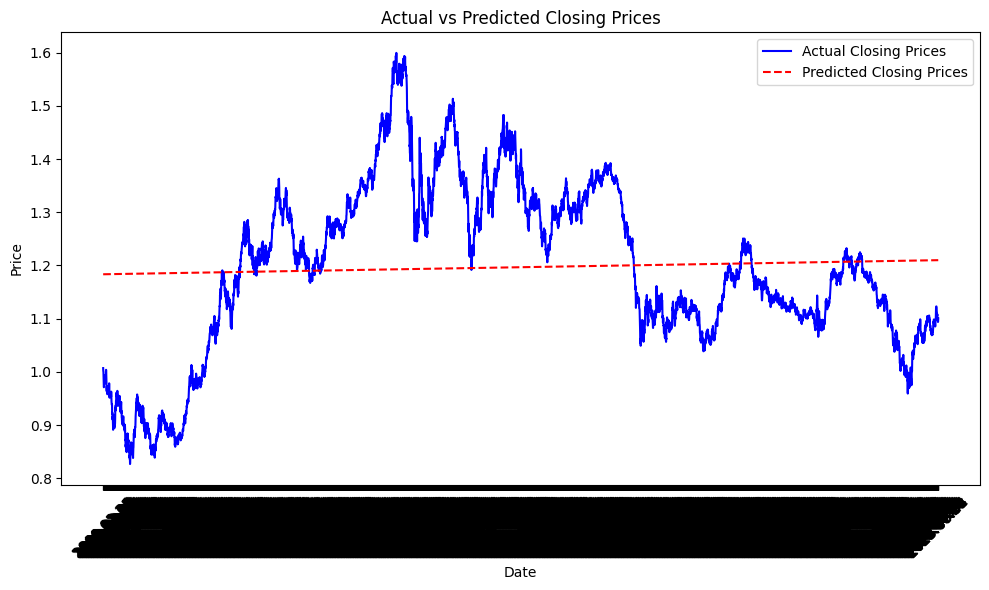

Error 1100, reqId -1: Connectivity between IBKR and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IBKR and Trader Workstation has been restored - data maintained. All data farms are connected: usfarm.nj; cashfarm; usfarm; euhmds; fundfarm; ushmds; secdefil.
Error 1100, reqId -1: Connectivity between IBKR and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IBKR and Trader Workstation has been restored - data maintained. All data farms are connected: usfarm.nj; cashfarm; usfarm; euhmds; fundfarm; ushmds; secdefil.
Error 1100, reqId -1: Connectivity between IBKR and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IBKR and Trader Workstation has been restored - data maintained. All data farms are connected: usfarm.nj; cashfarm; usfarm; euhmds; fundfarm; ushmds; secdefil.
Error 1100, reqId -1: Connectivity between IBKR and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IBKR

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Load the historical data from the Excel file
data = pd.read_excel('Daily_EURUSD_Historical_Data.xlsx')

# Check the structure of the data
print(data.head())

# Extract the features (dates) and target variable (closing prices)
dates = data['Date']
closing_prices = data['Close']

# Prepare the features (dates) as numerical values for regression
# For simplicity, we'll use the index of each date as a numerical value
# You may need to preprocess your data differently depending on your dataset
dates_numeric = np.arange(len(dates)).reshape(-1, 1)

# Split the data into training and testing sets
dates_train, dates_test, prices_train, prices_test = train_test_split(dates_numeric, closing_prices, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(dates_train, prices_train)

# Evaluate the model
train_score = model.score(dates_train, prices_train)
test_score = model.score(dates_test, prices_test)
print("Training R-squared:", train_score)
print("Testing R-squared:", test_score)

# Make predictions
predictions = model.predict(dates_numeric)

# Implement a simple trading strategy
# For demonstration purposes, let's say we buy if the predicted price for tomorrow is higher than today's price
# and sell if it's lower
actions = []
for i in range(len(predictions)-1):
    if predictions[i+1] > predictions[i]:
        actions.append("Buy")
    else:
        actions.append("Sell")

# Print the actions
print(actions)

plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label='Actual Closing Prices', color='blue')
plt.plot(dates, predictions, label='Predicted Closing Prices', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()